In [ ]:
!pip install pandas geopandas tweetpy geojson shapely numpy

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-6x536xr8
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-6x536xr8
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit fdbd741126144236b6b7db822db5ddc8096e449a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev30+gfdbd741-py3-none-any.whl size=73168 sha256=fe837d9004ec799e74d2b21d6245522edbbf0edf278858390215a6b118c2aa14
  Stored in directory: /tmp/pip-ephem-wheel-cache-yq5900xj/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [ ]:
import folium
import geopandas as gdp
import csv, json
from geojson import Feature, FeatureCollection, Point
import shapely
from shapely import wkt
from shapely.geometry import Point
import io
import numpy as np

In [ ]:
loc = '-37.66009435504885, 144.9361368951882, 5km'
data = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'Quality geocode:"{}"'.format(loc)).get_items(), 500))[['date', 'user', 'coordinates','renderedContent']]

In [ ]:
df_new = pd.DataFrame(data)
df_new

,date,user,coordinates,renderedContent
0,2023-05-28 03:14:34+00:00,"{'username': 'CashForCarsCam1', 'id': 12919523...",None,Cash For Cars Attwood - Old Junk Car Buyers. T...
1,2023-05-03 21:37:39+00:00,"{'username': 'garbuthnot1', 'id': 2793374715, ...","{'longitude': 144.93488184, 'latitude': -37.64...",Fabulous to meet Dham and Dula earlier this we...
2,2023-04-23 00:13:05+00:00,"{'username': 'steven_kolber', 'id': 2183674998...","{'longitude': 144.89801208, 'latitude': -37.71...",#edureading paper: link.springer.com/article/1...
3,2021-01-27 15:39:13+00:00,"{'username': 'blair_dellemijn', 'id': 76932210...","{'longitude': 144.94812395, 'latitude': -37.61...",A grouse night of shooting with some quality h...
4,2019-12-14 02:31:33+00:00,"{'username': 'JPSCoatings', 'id': 189474814, '...","{'longitude': 144.96172, 'latitude': -37.65905}",evolvingelements #duramembrane being filled au...
5,2019-11-24 00:14:47+00:00,"{'username': 'M_Alaoui', 'id': 64160594, 'disp...",None,Is the water quality ever going to be ok in ci...
6,2019-10-24 20:56:58+00:00,"{'username': 'JPSCoatings', 'id': 189474814, '...","{'longitude': 144.961805, 'latitude': -37.658821}",SUPACOTE - POLYMER MODIFIED RENDER\nLooking fo...
7,2019-09-23 22:09:53+00:00,"{'username': 'JPSCoatings', 'id': 189474814, '...","{'longitude': 144.961805, 'latitude': -37.658821}",DON’T OVERLOOK THE FINISHING TOUCHES!\nWhen fi...
8,2019-09-01 19:37:06+00:00,"{'username': 'vapestreet_au', 'id': 3065959972...","{'longitude': 144.95949647, 'latitude': -37.66...",Lost Vape Lyra Pod System is the successor of ...
9,2018-10-29 03:27:58+00:00,"{'username': 'halfprice_print', 'id': 11387002...","{'longitude': 144.95184, 'latitude': -37.6884299}",Our good friends tabouli_on_lygon are reinvent...


In [ ]:
for loc in list_parks:
    lon, lat = str(loc[0]), str(loc[1])
    location = lon +', ' + lat +', ' + '10km'
    data = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
            'pizza geocode:"{}"'.format(location)).get_items(), 20))[['user']]

    #print(list(data))
    print(data.head())

In [ ]:
!pip install pandas matplotlib nltk wordcloud


In [ ]:
!pip install seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import string
import re


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


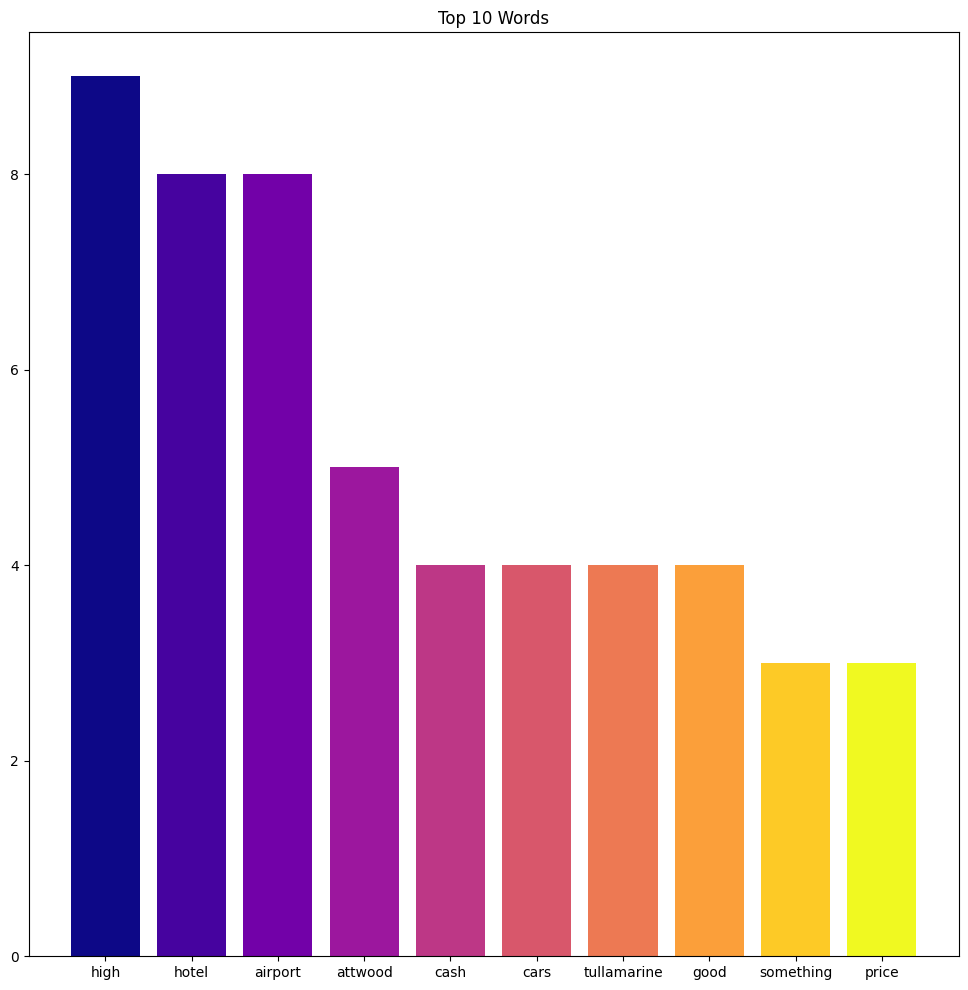

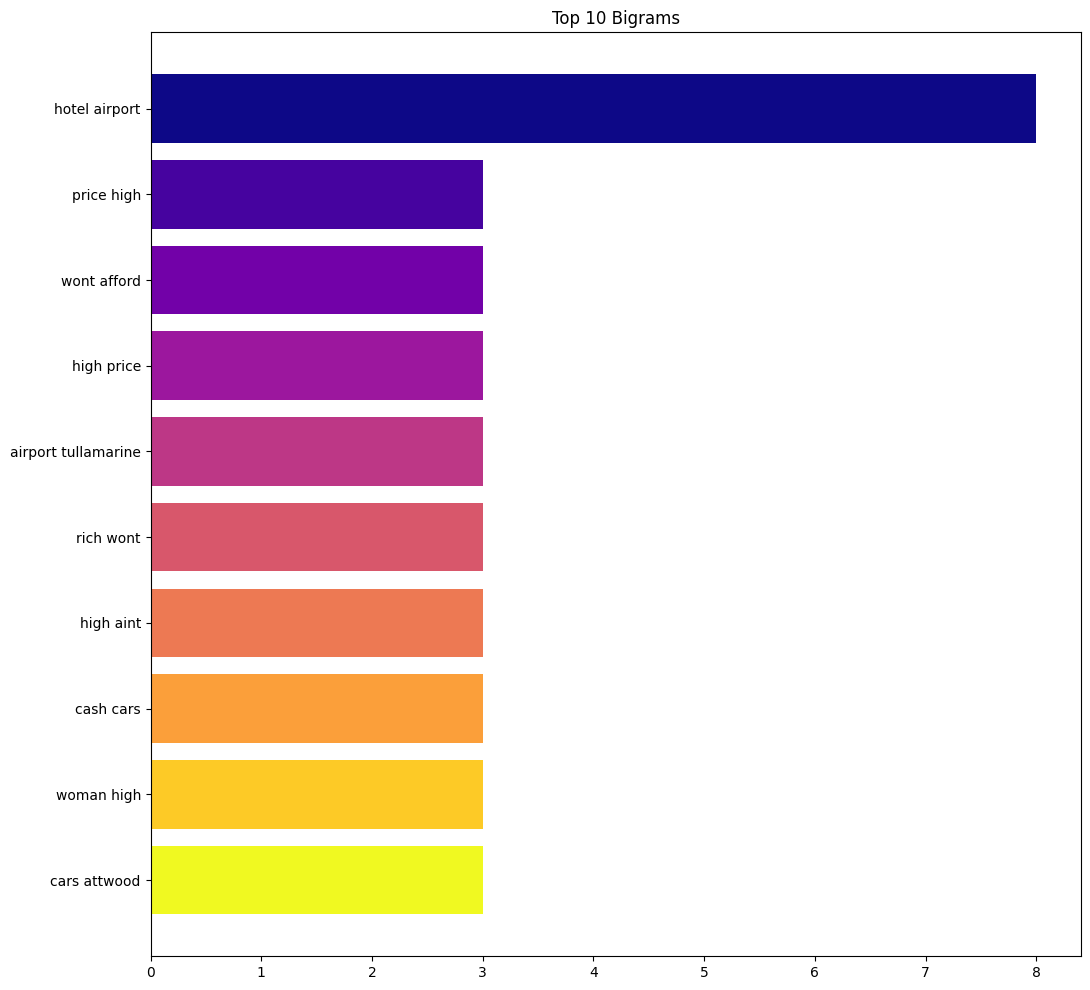

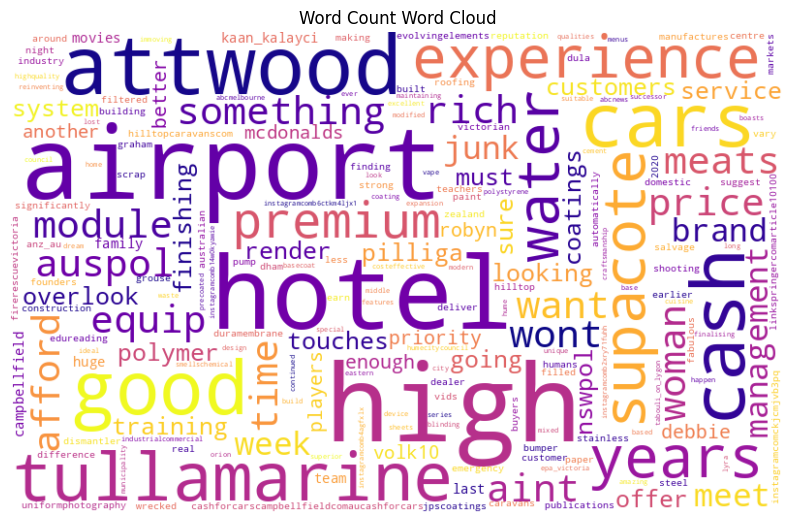

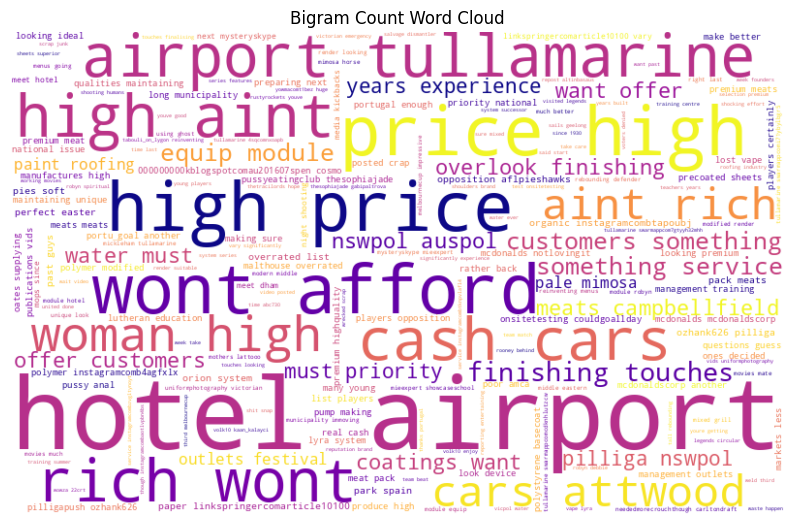

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

# specify stopwords
stopwords = nltk.corpus.stopwords.words('english')

stopwords.extend(['http', 'https', 'com', 'amp', 'melbourne', 'the', ',', 'australia', 'today', 'ndis', 'quality'])

def preprocess_text(text):
    # convert all text to lower case
    text = text.lower()
    # remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # remove punctuation and single-character words/symbols
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # remove 3 letter words
    text = re.sub(r'\b\w{1,3}\b', '', text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

df_new['processedContent'] = df_new['renderedContent'].apply(lambda x: preprocess_text(x))



# word count
word_count = FreqDist(nltk.tokenize.word_tokenize(' '.join(df_new['processedContent'])))
word_count_df = pd.DataFrame(word_count.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)


vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df_new['processedContent'])
bigram_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# bar plot for word count
plt.figure(figsize=(12, 12))
colors = plt.cm.plasma(np.linspace(0, 1, 10))
plt.bar(word_count_df['Word'][:10], word_count_df['Frequency'][:10], color=colors)
plt.title('Top 10 Words')
plt.show()

# bar plot for bigram count
plt.figure(figsize=(12, 12))
colors = plt.cm.plasma(np.linspace(0, 1, 10))
plt.barh(bigram_count.index[:10], bigram_count.values[:10], color=colors)
plt.gca().invert_yaxis()
plt.title('Top 10 Bigrams')
plt.show()

# Generate word cloud for word count with white background and circular shape
wordcloud = WordCloud(width=800,
                      height=500,
                      random_state=21,
                      max_font_size=110,
                      colormap="plasma",
                      background_color='white',
                      contour_width=3,
                      contour_color='white').generate_from_frequencies(word_count)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Count Word Cloud')
plt.show()

# Generate word cloud for bigram count with white background and circular shape
wordcloud = WordCloud(width=800,
                      height=500,
                      random_state=21,
                      max_font_size=110,
                      colormap="plasma",
                      background_color='white',
                      contour_width=3,
                      contour_color='white').generate_from_frequencies(bigram_count)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Bigram Count Word Cloud')
plt.show()


In [ ]:
df_clean = data.dropna(how = "any")
df_clean.info()
df_clean.reset_index(inplace=True, drop = True)
df_clean.head()

In [ ]:
lon = []
lat = []

pt = []


for x in range(len(df_clean)):
    ln = df_clean.iloc[x]['coordinates']['longitude']
    lt = df_clean.iloc[x]['coordinates']['latitude']

    lon.append(ln)
    lat.append(lt)

    pt.append([Point(lt, ln)])

In [ ]:
m = folium.Map(location=[np.mean(lat), np.mean(lon)], zoom_start=15, tiles='cartodbdark_matter')

In [ ]:
m

In [ ]:
for loc in range(len(df_clean)):
    ln = df_clean.iloc[loc]['coordinates']
    print(ln)

{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.338079}
{'longitude': 13.088304, 'latitude': 52.

In [ ]:
id = []

for x in range(len(df_clean)):
    id.append(x)

In [ ]:
df_clean['id_number'] = id

<ipython-input-12-21bd5aeb6910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['id_number'] = id


In [ ]:
lon = []
lat = []

pt = []


for x in range(len(df_clean)):
    ln = df_clean.iloc[x]['coordinates']['longitude']
    lt = df_clean.iloc[x]['coordinates']['latitude']

    lon.append(ln)
    lat.append(lt)

    pt.append([Point(lt, ln)])

In [ ]:
df_clean.drop(columns=['id'])

KeyError: ignored

In [ ]:


df_clean['longitude'] = lon
df_clean['latitude'] = lat
df_clean['geometry'] = pt

C:\Users\secg\AppData\Local\Temp\ipykernel_30712\1631290000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['longitude'] = lon
C:\Users\secg\AppData\Local\Temp\ipykernel_30712\1631290000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['latitude'] = lat
C:\Users\secg\AppData\Local\Temp\ipykernel_30712\1631290000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
feature_id = folium.FeatureGroup(name='id')

for i in range(0, len(df_clean)):
    id_num = df_clean.iloc[i]['id']
    popup = """id: <b>%s</b><br>"""%(id_num)
    folium.CircleMarker(location=[df_clean.iloc[i]['latitude'], df_clean.iloc[i]['longitude']],
        radius=0.85,
        tooltip=popup,
        weight = 0.5, color='red').add_to(feature_id)

feature_id.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

In [ ]:
df_final = df_clean.drop(columns='id')

In [ ]:
df_final.head()

,date,content,user,coordinates,id_number,longitude,latitude,geometry
0,2022-06-13 15:51:59+00:00,"""Some thought that #welfare #liberty #peace ar...","{'username': 'ranialabaki', 'id': 1333428571, ...","{'longitude': 13.088304, 'latitude': 52.338079}",0,13.088304,52.338079,[POINT (52.338079 13.088304)]
1,2022-06-13 04:27:46+00:00,Women and men in #UNSC must go back on track t...,"{'username': 'MarionBoeker', 'id': 244053211, ...","{'longitude': 13.088304, 'latitude': 52.338079}",1,13.088304,52.338079,[POINT (52.338079 13.088304)]
2,2022-06-12 21:08:26+00:00,"@TsitsiDangarembga, welcome. \nA #peace activi...","{'username': 'MarionBoeker', 'id': 244053211, ...","{'longitude': 13.088304, 'latitude': 52.338079}",2,13.088304,52.338079,[POINT (52.338079 13.088304)]
3,2022-06-12 19:49:57+00:00,"Peace Gardens in Berlin, a great place to rela...","{'username': 'Nadin_plants', 'id': 15174508754...","{'longitude': 13.088304, 'latitude': 52.338079}",3,13.088304,52.338079,[POINT (52.338079 13.088304)]
4,2022-06-11 23:40:26+00:00,Okay guys I managed to open the door after hou...,"{'username': 'LoL_Outlandisch', 'id': 87912513...","{'longitude': 13.088304, 'latitude': 52.338079}",4,13.088304,52.338079,[POINT (52.338079 13.088304)]


In [ ]:
df_final.to_csv('geoOpt_01/Bernlin_peace_v1.csv')